<a href="https://colab.research.google.com/github/colaresm/Machine-Learning-Projects/blob/main/Prevendo_o_pre%C3%A7o_das_a%C3%A7%C3%B5es_da_Microsoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import warnings
from statsmodels.tsa.arima_model import ARIMA

# Leitura dos dados

In [3]:
dataset = pd.read_csv('/content/Microsoft_Stock.csv')

In [4]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [7]:
y = dataset['Close']

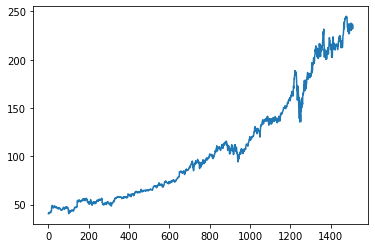

In [9]:
plt.plot(y)

# Componentes da série temporal

Uma série temporal possui 3 componentes:


*   X(t)- O valor médio da série.
*   T(t)- Tendência
*   S(t)- Sazonal(periódica)
*   N(t)- Ruído(parte aleatória)
<br>
Assim uma série temporal $X(t)$ pode ser decomposta de da seguinte forma aditiva:
$$ Y(t)= X(t)+T(t)+S(t)+N(t)$$


In [15]:
result = seasonal_decompose(y, model='additive',freq=90)

Text(0.5, 1.0, 'Resíduo')

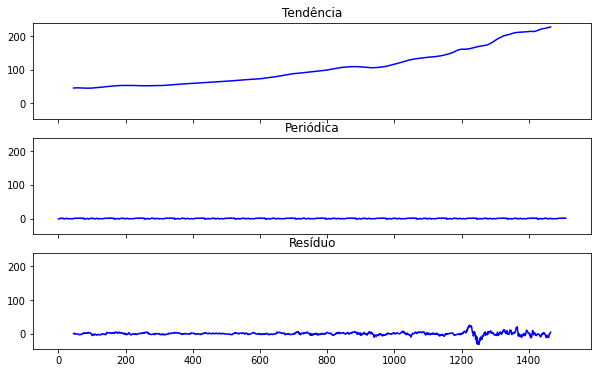

In [16]:
fig, axs = plt.subplots(3, sharex=True, sharey=True,figsize=(10,6))
#fig.suptitle('Componentes da Série')
axs[0].plot(result.trend,color='b')
axs[0].set_title("Tendência")
axs[1].plot(result.seasonal,color='b')
axs[1].set_title("Periódica")
axs[2].plot(result.resid,color='b')
axs[2].set_title("Resíduo")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Média: -0.16072260030864574
Desvio padrão: 4.535135618113649


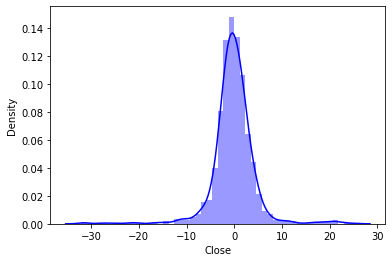

In [19]:
sns.distplot(result.resid,color='b')
print('Média:',np.mean(result.resid))
print('Desvio padrão:',np.std(result.resid))

# Médias móveis

As médias móveis são uma forma de observar tendências de forma mais clara. Aqui utilizaremos a média móvel simples.

In [26]:
def mediamovel(dados,janela):
  numbers = dados
  window_size = janela
  numbers_series = pd.Series(numbers)
  windows = numbers_series.rolling(window_size)
  moving_averages = windows.mean()
  moving_averages_list = moving_averages.tolist()
  without_nans = moving_averages_list[window_size - 1:]
  return np.round(without_nans,4)

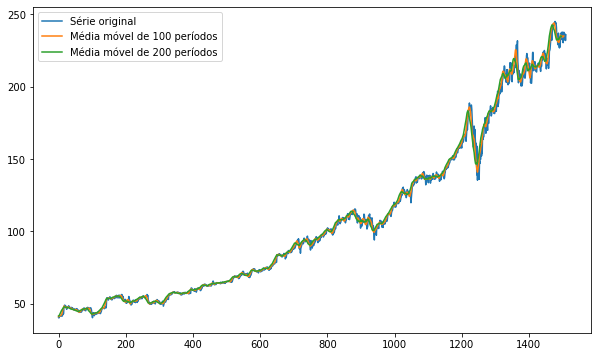

In [30]:
plt.figure(figsize=(10,6))
plt.plot(y,label='Série original')
plt.plot(mediamovel(y,7),label='Média móvel de 100 períodos')
plt.plot(mediamovel(y,14),label='Média móvel de 200 períodos')
plt.legend()

# Modelo ARIMA


In [100]:
ytrain = y[0:int(len(y)-21)]
ytest = y[int(len(y)-21):len(y)]

In [87]:
def arima(dados,p,d,q):
  model = ARIMA(dados,order=(p,d,q)).fit()
  predicao=model.forecast(steps=21)[0]
  fited_values = model.predict(typ='levels')
  return fited_values,predicao

In [101]:
y_pred =  arima(ytrain,7,1,1)

In [118]:
N =len(y)
t= np.linspace(1,N,N)
ttest=t[len(y)-21:len(y)]

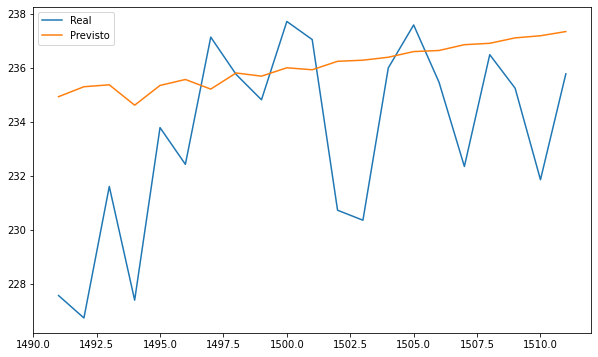

In [121]:
plt.figure(figsize=(10,6))
plt.plot(ttest,ytest,label='Real')
plt.plot(ttest,y_pred[1],label='Previsto')
plt.legend()

In [127]:
'MSE',sum(y_pred[1]-ytest)**2/len(ttest)

('MSE', 136.30151137999377)